In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np

import matplotlib.pyplot as plt

import time

import networks

import data_gen

%matplotlib notebook
plt.ion()

In [26]:
f = open('dataPointsLow.txt')
text = f.readlines()
text = text

dataDict = {}
for i in range(0, len(text), 4):
    structure = text[i].strip().split(',')
    width = int(structure[0])
    depth = int(structure[1])
    nparams = int(structure[2])
    test = [float(val) for val in text[i+1].strip().split(',')[1:]]
    train = [float(val) for val in text[i+2].strip().split(',')[1:]]
    time = float(text[i+3].strip().split(',')[-1])
    
    thisDict = {'nparams':nparams, 'test':test, 'train':train, 'time':time}
    
    dataDict[(width, depth)] = thisDict

<IPython.core.display.Javascript object>


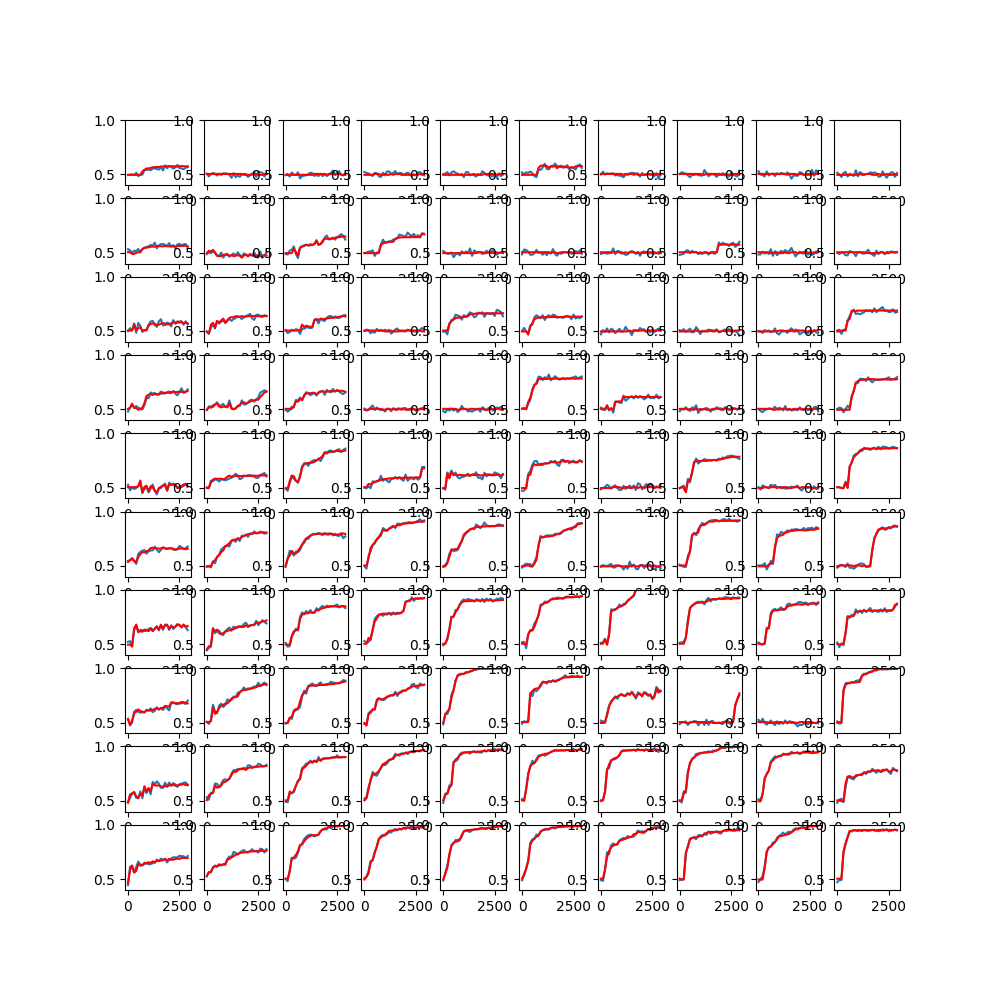

In [37]:
fig = plt.figure(figsize=(10, 10))

points = range(0, 5000, 100)

for width in range(1, 11):
    for depth in range(1, 11):
        ax = fig.add_subplot(10, 10, (width-1)*10 + depth)
        ax.plot(points[0:30], dataDict[(width, depth)]['train'][0:30])
        ax.plot(points[0:30], dataDict[(width, depth)]['test'][0:30], 'r')
        ax.set_ylim([0.4, 1.0])

In [39]:
dataDict = {}
for j in range(10):
    f = open('data/dataPointsLow' + str(j) + '.txt')
    text = f.readlines()
    text = text

    for i in range(0, len(text), 4):
        structure = text[i].strip().split(',')
        width = int(structure[0])
        depth = int(structure[1])
        nparams = int(structure[2])
        test = [float(val) for val in text[i+1].strip().split(',')[1:]]
        train = [float(val) for val in text[i+2].strip().split(',')[1:]]
        time = float(text[i+3].strip().split(',')[-1])

        thisDict = {'nparams':nparams, 'test':test, 'train':train, 'time':time}

        dataDict.setdefault((width, depth), []).append(thisDict)

<IPython.core.display.Javascript object>


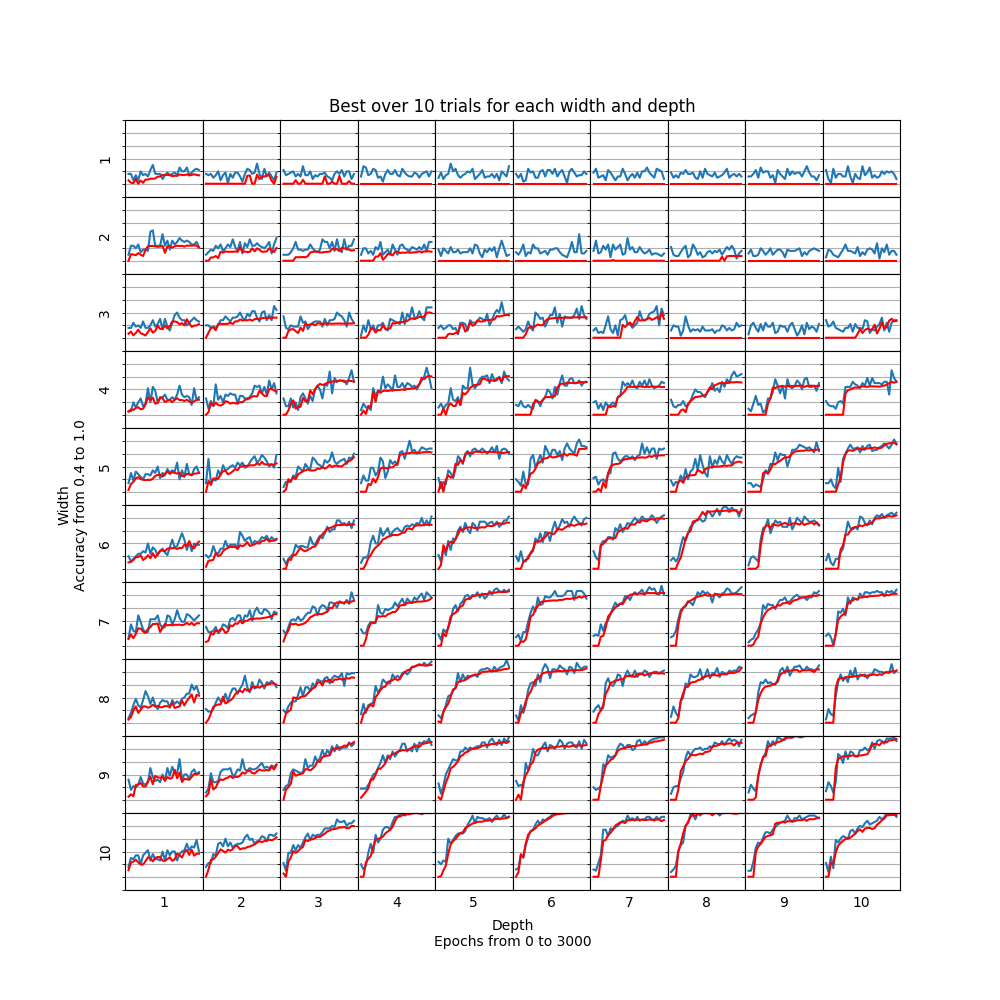

In [95]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

points = range(0, 5000, 100)

ax = fig.add_subplot(111)
ax.set_xlabel('Depth\nEpochs from 0 to 3000')
ax.set_ylabel('Width\nAccuracy from 0.4 to 1.0')
ax.set_title('Best over 10 trials for each width and depth')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

for width in range(1, 11):
    for depth in range(1, 11):
        ax = fig.add_subplot(10, 10, (width-1)*10 + depth)
        trainData = np.zeros((10, 30))
        testData = np.zeros((10, 30))
        for i in range(10):
            trainData[i, :] = dataDict[(width, depth)][i]['train'][0:30]
            testData[i, :] = dataDict[(width, depth)][i]['test'][0:30]
            #ax.plot(points[0:30], dataDict[(width, depth)][i]['train'][0:30])
            #ax.plot(points[0:30], dataDict[(width, depth)][i]['test'][0:30])
            #ax.set_ylim([0.4, 1.0])
        ax.plot(points[0:30], np.max(trainData, axis=0))
        ax.plot(points[0:30], np.max(testData, axis=0), 'r')
        ax.set_ylim([0.4, 1.0])
        
        if width == 10:
            ax.set_xlabel(depth)
        if depth == 1:
            ax.set_ylabel(width)
            
        ax.set_xticks([])
        ax.set_yticks([], minor=False)
        ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], minor=True)
        ax.yaxis.grid(True, which='minor')

In [69]:
dataDict = {}
for j in range(10):
    f = open('dataRegression30/dataPointsLow' + str(j) + '.txt')
    text = f.readlines()
    text = text

    for i in range(0, len(text), 4):
        structure = text[i].strip().split(',')
        width = int(structure[0])
        depth = int(structure[1])
        nparams = int(structure[2])
        test = [float(val) for val in text[i+1].strip().split(',')[1:]]
        train = [float(val) for val in text[i+2].strip().split(',')[1:]]
        time = float(text[i+3].strip().split(',')[-1])

        thisDict = {'nparams':nparams, 'test':test, 'train':train, 'time':time}

        dataDict.setdefault((width, depth), []).append(thisDict)

In [68]:
points = range(0, 2000, 100)

datTrain = np.zeros((30, 30))
datTest = np.zeros((30, 30))
datTime = np.zeros((30, 30))
for width in range(1, 31):
    for depth in range(1, 31):
        trainData = np.zeros((10, 20))
        testData = np.zeros((10, 20))
        timeData = np.zeros((10, 1))
        for i in range(10):
            trainData[i, :] = dataDict[(width, depth)][i]['train'][0:20]
            testData[i, :] = dataDict[(width, depth)][i]['test'][0:20]
            timeData[i] = dataDict[(width, depth)][i]['time']
        
        datTrain[width-1, depth-1] = np.mean(trainData[:, -1])
        datTest[width-1, depth-1] = np.mean(testData[:, -1])
        datTime[width-1, depth-1] = np.mean(timeData)

KeyError: (1, 11)

<IPython.core.display.Javascript object>


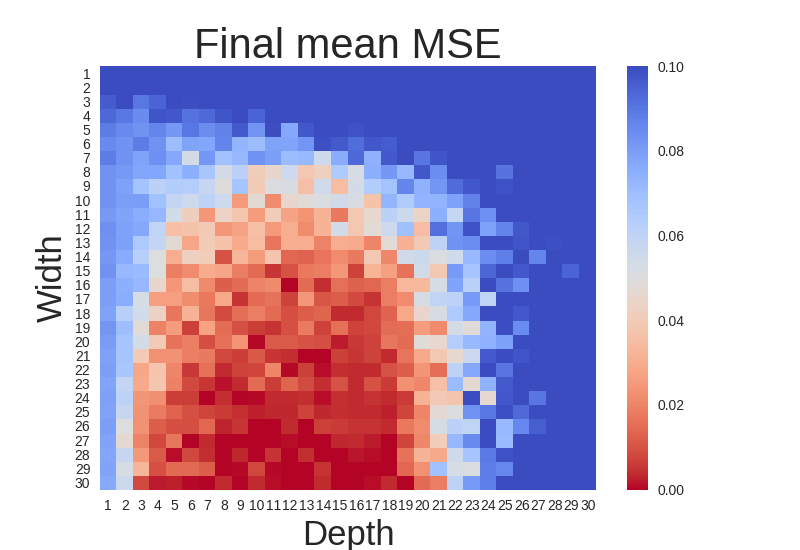

In [56]:
import seaborn as sns
fig, ax = plt.subplots()
sns.heatmap(datTest, ax=ax, cmap='coolwarm_r', vmin=0, vmax=0.1);
ax.set_xlabel('Depth', fontsize=25);
ax.set_ylabel('Width', fontsize=25);
ax.set_title('Final mean MSE', fontsize=30);
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_yticklabels(list(range(30, 0, -1)), rotation=0);
ax.set_xticklabels(list(range(1, 31)), rotation=0);

<IPython.core.display.Javascript object>


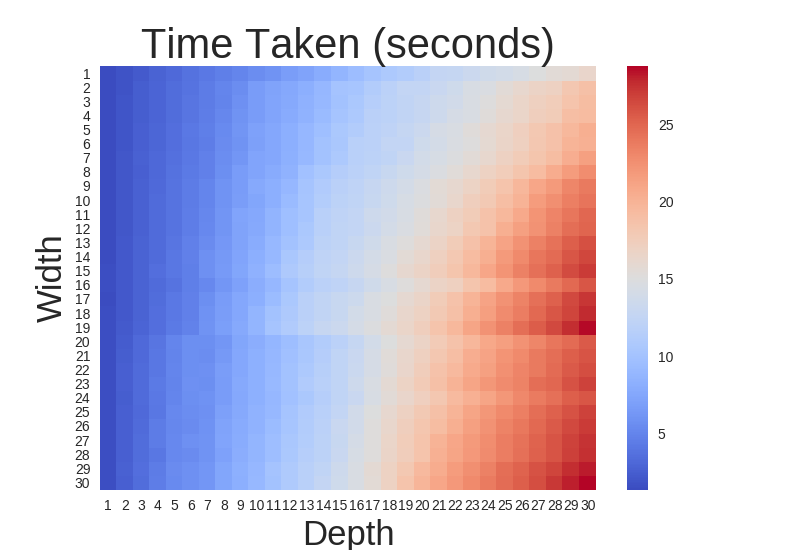

In [57]:
import seaborn as sns
fig, ax = plt.subplots()
sns.heatmap(datTime, ax=ax, cmap='coolwarm');
ax.set_xlabel('Depth', fontsize=25);
ax.set_ylabel('Width', fontsize=25);
ax.set_title('Time Taken (seconds)', fontsize=30);
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_yticklabels(list(range(30, 0, -1)), rotation=0);
ax.set_xticklabels(list(range(1, 31)), rotation=0);

In [58]:
dataDict = {}
for j in range(10):
    f = open('data/dataPointsLow' + str(j) + '.txt')
    text = f.readlines()
    text = text

    for i in range(0, len(text), 4):
        structure = text[i].strip().split(',')
        width = int(structure[0])
        depth = int(structure[1])
        nparams = int(structure[2])
        test = [float(val) for val in text[i+1].strip().split(',')[1:]]
        train = [float(val) for val in text[i+2].strip().split(',')[1:]]
        time = float(text[i+3].strip().split(',')[-1])

        thisDict = {'nparams':nparams, 'test':test, 'train':train, 'time':time}

        dataDict.setdefault((width, depth), []).append(thisDict)

In [64]:
points = range(0, 3500, 100)

datTrain = np.zeros((10, 10))
datTest = np.zeros((10, 10))
datTime = np.zeros((10, 10))
for width in range(1, 11):
    for depth in range(1, 11):
        trainData = np.zeros((9, 35))
        testData = np.zeros((9, 35))
        for i in range(9):
            trainData[i, :] = dataDict[(width, depth)][i]['train'][0:35]
            testData[i, :] = dataDict[(width, depth)][i]['test'][0:35]
            timeData[i] = dataDict[(width, depth)][i]['time']
        
        datTrain[width-1, depth-1] = np.min(trainData[:, -1])
        datTest[width-1, depth-1] = np.min(testData[:, -1])
        datTime[width-1, depth-1] = np.mean(timeData)

<IPython.core.display.Javascript object>


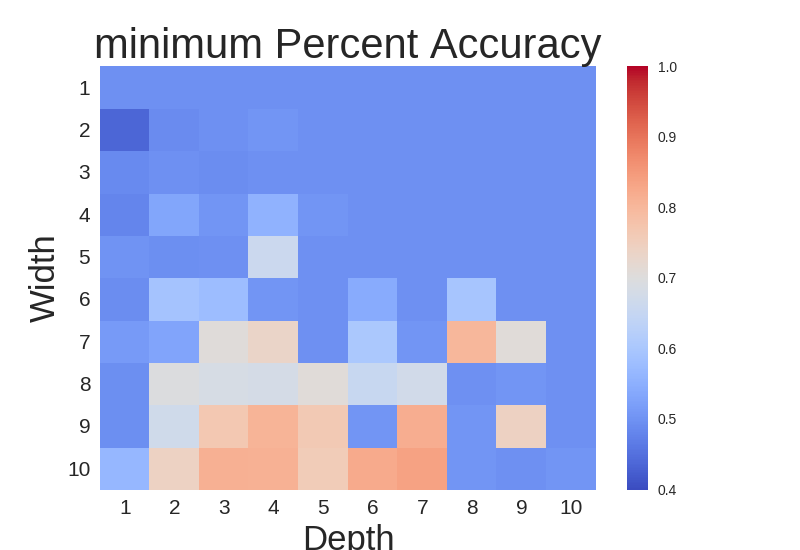

In [65]:
import seaborn as sns
fig, ax = plt.subplots()
sns.heatmap(datTest, ax=ax, vmin=0.4, vmax=1.0, cmap='coolwarm');
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Depth', fontsize=25);
ax.set_ylabel('Width', fontsize=25);
ax.set_title('minimum Percent Accuracy', fontsize=30);
ax.set_yticklabels(list(range(10, 0, -1)), rotation=0);
ax.set_xticklabels(list(range(1, 11)), rotation=0);

<IPython.core.display.Javascript object>


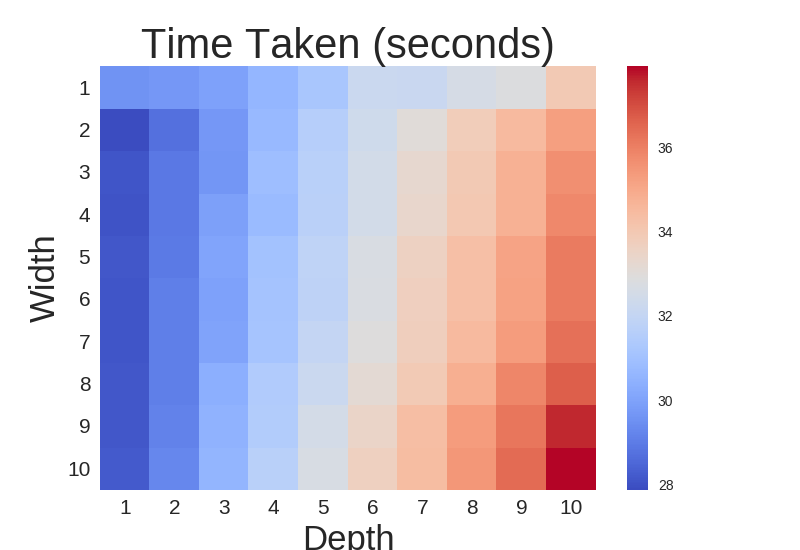

In [66]:
import seaborn as sns
fig, ax = plt.subplots()
sns.heatmap(datTime, ax=ax, cmap='coolwarm');
ax.set_xlabel('Depth', fontsize=25);
ax.set_ylabel('Width', fontsize=25);
ax.set_title('Time Taken (seconds)', fontsize=30);
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticklabels(list(range(10, 0, -1)), rotation=0);
ax.set_xticklabels(list(range(1, 11)), rotation=0);

<IPython.core.display.Javascript object>


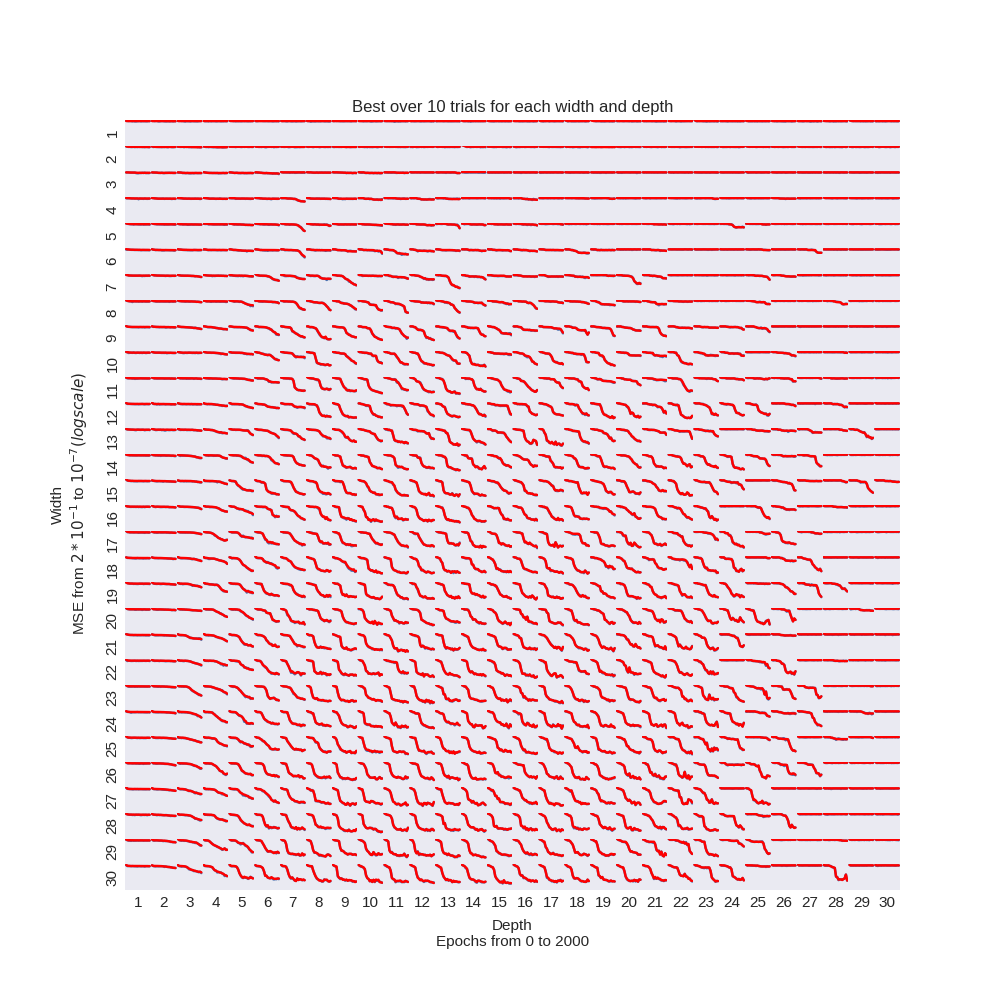

In [79]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

points = range(0, 2000, 100)

ax = fig.add_subplot(111)
ax.set_xlabel('Depth\nEpochs from 0 to 2000')
ax.set_ylabel('Width\n MSE from $2*10^{-1}$ to $10^{-7} (log scale)$')
ax.set_title('Best over 10 trials for each width and depth')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
for width in range(1, 31):
    for depth in range(1, 31):
        ax = fig.add_subplot(30, 30, (width-1)*30 + depth)
        trainData = np.zeros((9, 20))
        testData = np.zeros((9, 20))
        for i in range(9):
            trainData[i, :] = dataDict[(width, depth)][i]['train']
            testData[i, :] = dataDict[(width, depth)][i]['test']
            #ax.plot(points[0:30], dataDict[(width, depth)][i]['train'][0:30])
            #ax.plot(points[0:30], dataDict[(width, depth)][i]['test'][0:30])
            #ax.set_ylim([0.4, 1.0])
        ax.semilogy(points, np.min(trainData, axis=0))
        ax.semilogy(points, np.min(testData, axis=0), 'r')
        ax.set_ylim([1e-7, 2e-1])
        
        if width == 30:
            ax.set_xlabel(depth)
        if depth == 1:
            ax.set_ylabel(width)
            
        ax.set_xticks([])
        ax.set_yticks([], minor=False)
        ax.set_yticks([], minor=True)
        #ax.yaxis.grid(True, which='minor')

In [119]:
dataDict = {}
for j in range(3):
    f = open('dataRegressionResnetWide/dataPointsLow' + str(j) + '.txt')
    text = f.readlines()
    text = text

    for i in range(0, len(text), 4):
        structure = text[i].strip().split(',')
        width = int(structure[0])
        depth = int(structure[1])
        nparams = int(structure[2])
        test = [float(val) for val in text[i+1].strip().split(',')[1:]]
        train = [float(val) for val in text[i+2].strip().split(',')[1:]]
        time = float(text[i+3].strip().split(',')[-1])

        thisDict = {'nparams':nparams, 'test':test, 'train':train, 'time':time}

        dataDict.setdefault((width, depth), []).append(thisDict)

In [131]:
points = range(0, 2000, 100)

datTrain = np.zeros((30, 30))
datTest = np.zeros((30, 30))
datTime = np.zeros((30, 30))
for width in range(1, 31):
    for depth in range(1, 31):
        trainData = np.zeros((3, 20))
        testData = np.zeros((3, 20))
        timeData = np.zeros((3, 1))
        for i in range(3):
            trainData[i, :] = dataDict[(width, depth)][i]['train'][0:20]
            testData[i, :] = dataDict[(width, depth)][i]['test'][0:20]
            timeData[i] = dataDict[(width, depth)][i]['time']
        
        datTrain[width-1, depth-1] = np.min(trainData[:, -1])
        datTest[width-1, depth-1] = np.min(testData[:, -1])
        datTime[width-1, depth-1] = np.mean(timeData)

<IPython.core.display.Javascript object>


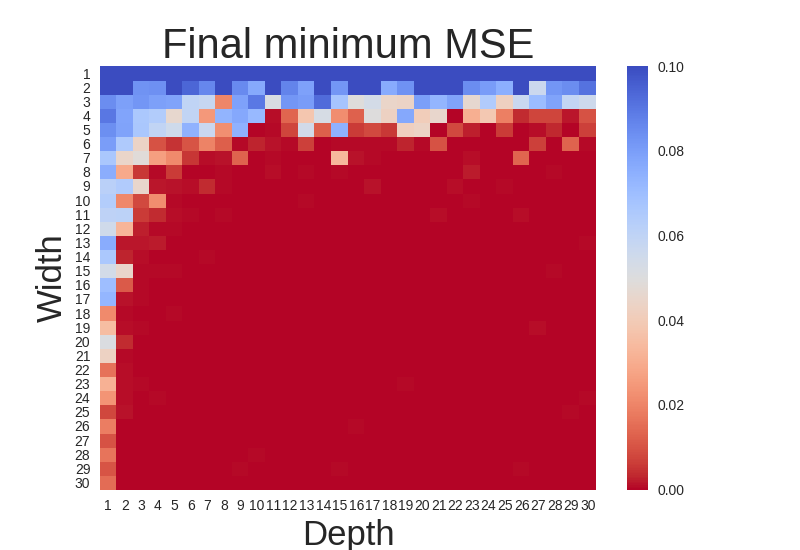

In [132]:
import seaborn as sns
fig, ax = plt.subplots()
sns.heatmap(datTest, ax=ax, cmap='coolwarm_r', vmin=0, vmax=0.1);
ax.set_xlabel('Depth', fontsize=25);
ax.set_ylabel('Width', fontsize=25);
ax.set_title('Final minimum MSE', fontsize=30);
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_yticklabels(list(range(30, 0, -1)), rotation=0);
ax.set_xticklabels(list(range(1, 31)), rotation=0);

<IPython.core.display.Javascript object>


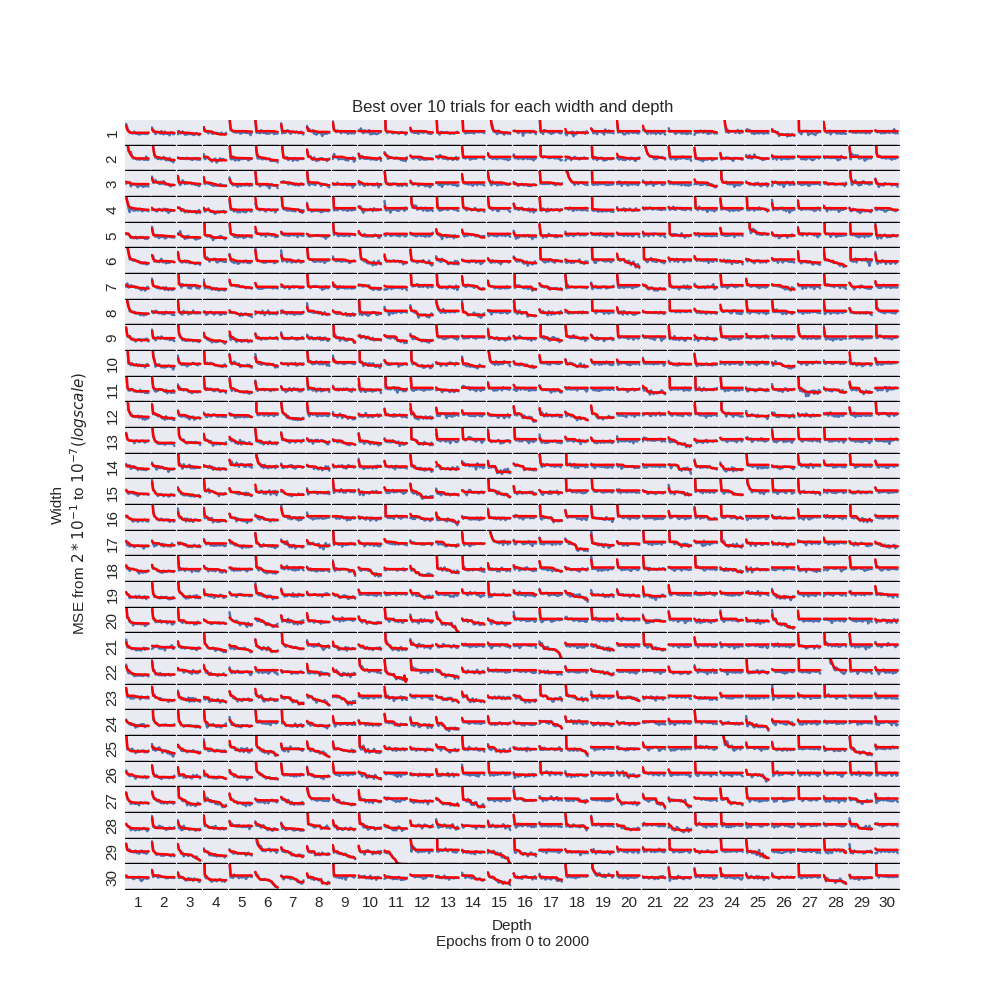

In [113]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

points = range(0, 2000, 100)

ax = fig.add_subplot(111)
ax.set_xlabel('Depth\nEpochs from 0 to 2000')
ax.set_ylabel('Width\n MSE from $2*10^{-1}$ to $10^{-7} (log scale)$')
ax.set_title('Best over 10 trials for each width and depth')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
for width in range(1, 31):
    for depth in range(1, 31):
        ax = fig.add_subplot(30, 30, (width-1)*30 + depth)
        trainData = np.zeros((5, 20))
        testData = np.zeros((5, 20))
        for i in range(5):
            trainData[i, :] = dataDict[(width, depth)][i]['train']
            testData[i, :] = dataDict[(width, depth)][i]['test']
            #ax.plot(points[0:30], dataDict[(width, depth)][i]['train'][0:30])
            #ax.plot(points[0:30], dataDict[(width, depth)][i]['test'][0:30])
            #ax.set_ylim([0.4, 1.0])
        ax.semilogy(points, np.min(trainData, axis=0))
        ax.semilogy(points, np.min(testData, axis=0), 'r')
        ax.set_ylim([1e-7, 2e-1])
        
        if width == 30:
            ax.set_xlabel(depth)
        if depth == 1:
            ax.set_ylabel(width)
            
        ax.set_xticks([])
        ax.set_yticks([], minor=False)
        ax.set_yticks([], minor=True)
        #ax.yaxis.grid(True, which='minor')